<a href="https://colab.research.google.com/github/DSimonne/PhDScripts/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fitting data

Small networks, or networks with a relatively
small number of parameters, have a low capacity and are therefore likely to underfit, resulting in poor performance, since they cannot learn the underlying structure of complex datasets. However, very large networks may result in overfitting, where the network will memorize the training data and do extremely well on the training dataset while achieving a poor performance on the held-out test dataset.

L1 and L2 regularization, can prevent or reduce the effect
of overfitting by adding a penalty to the loss that results in shrinking the weight parameters during training. While both L1 and L2 regularization can be used for NNs as well, with L2 being the more common choice of the two, there are other methods for regularizing NNs, such as dropout.

# Dropout

Dropout is usually applied to the hidden units of higher layers and works as follows: during the training phase of an NN, a fraction of the hidden units is randomly dropped at every iteration with probability $p_{drop}$. Common choice is 0.5.

The effect of this random dropout is that the network is forced to learn a redundant representation of the data. Therefore, the network cannot rely on an activation of any set of hidden units, since they may be turned off at any time during training, and is forced to learn more general and robust patterns from the data.

*This random dropout can effectively prevent overfitting.* 
With probability p = 0.5 during the training phase, half of the neurons will become inactive randomly. However, during prediction, all neurons will contribute to computing the pre-activations of the next layer.

# Loss function for classification

Here we want a binary classification (not multiclass) and the output should be a probability not logit.
**Binary cross-entropy** is the
loss function for a binary classification (with a single output unit)

# Subsampling

Pooling (max-pooling) introduces a local invariance. This means that small
changes in a local neighborhood do not change the result of max-pooling. Therefore, it helps with generating features that are more robust to noise in
the input data.

Pooling decreases the size of features, which results in higher computational
efficiency. Furthermore, reducing the number of features may reduce the
degree of overfitting as well.

While pooling is still an essential part of many CNN architectures, several CNN
architectures have also been developed without using pooling layers. Instead of
using pooling layers to reduce the feature size, researchers use convolutional layers with a stride of 2. In a sense, you can think of a convolutional layer with stride 2 as a pooling layer with learnable weights.

# Activation functions
In this model, for each layer, we will apply the leaky ReLU activation function. The use of ReLU results in sparse gradients, which may not be suitable when we want to have the gradients for the full range of input values.

Furthermore, the output layer in the generator uses the hyperbolic tangent (tanh) activation function. (Using tanh activation is recommended for the generator network since it helps with the learning.)

In the discriminator network, each dense layer is also followed by a dropout layer. The output layer in the discriminator has no activation function (that is, linear activation) to get the logits. Alternatively, we can use the sigmoid activation function to get probabilities as output.

# Optimizers

Note that in this implementation, we used the tf.keras.optimizers.Adam() class for training the CNN model. The Adam optimizer is a robust, gradient-based optimization method suited to nonconvex optimization and machine learning problems. Two popular optimization methods inspired Adam: RMSProp and AdaGrad. The key advantage of Adam is in the choice of update step size derived from the running average of gradient moments.

# DCGAN model

Using convolutional layers for both the generator and discriminator networks. Starting from a random vector, z, the DCGAN first uses a fully connected layer to project z into a new vector with a proper size so that it can be reshaped into a spatial convolution representation ( ℎ × 𝑤 × 𝑐 ), which is smaller than the output image size. Then, a series of convolutional layers, known
as transposed convolution, are used to upsample the feature maps to the desired
output image size

# Upsampling
A transposed convolution operation is usually used for
upsampling the feature space. Focused on recovering the dimensionality of the feature space and not the actual values.

Upsampling feature maps using transposed convolution works by inserting 0s
between the elements of the input feature maps.

# Batch normalization

One of the main ideas behind BatchNorm is normalizing the layer inputs and preventing changes in their distribution during training, which enables faster and better convergence. BatchNorm transforms a mini-batch of features based on its computed statistics.

Assume that we have the net preactivation feature maps obtained after a
convolutional layer in a four-dimensional tensor, Z, with the shape [𝑚 × ℎ × 𝑤 × 𝑐].
where m is the number of examples in the batch (i.e., batch size), $ℎ \times 𝑤$ is the spatial dimension of the feature maps, and c is the number of channels.



1.   Compute the mean and standard deviation of the net inputs for each mini-
batch

      $\mu_B = \frac{1}{m \times h \times w} \Sigma_{𝑖,𝑗,𝑘} Z^{[𝑖,𝑗,𝑘,.]}$

      $\sigma_B^2 = \frac{1}{m \times h \times w} \Sigma_{𝑖,𝑗,𝑘} (Z^{[𝑖,𝑗,k,.]} -\mu_B )^2$

      where $\mu_B$ and $\sigma_B$ both have size c.

2.   Standardize the net inputs for all examples in the batch where $\epsilon$ is a small number for numerical stability (that is, to avoid division by zero).

      $Z_{std}^{[i]} = \frac{Z^{[i]} - \mu_B}{\sigma_B + \epsilon}$

3.  Scale and shift the normalized net inputs using two learnable parameter vectors, $\gamma$ and $\beta$ , of size c (number of channels):

  $A_{pre}^{[i]} = \gamma Z_{std}^{[i]} + \beta$

As a consequence, the final outputs are mean-centered and have *unit variance*, which is generally a useful property for gradient descent-based optimization.

On the other hand, always normalizing the net inputs such that they have the same properties across the different mini-batches, which can be diverse, can severely impact the representational capacity of NNs. This can be understood by considering a feature, 𝑥 ∼ 𝑁𝑁(0,1) , which, after sigmoid activation to 𝜎(𝑥) , results in a linear region for values close to 0. Therefore, in step 3, the learnable parameters, 𝜷 and 𝜸 , which are vectors of size c (number of channels), allow BatchNorm to control the shift and spread of the normalized features.



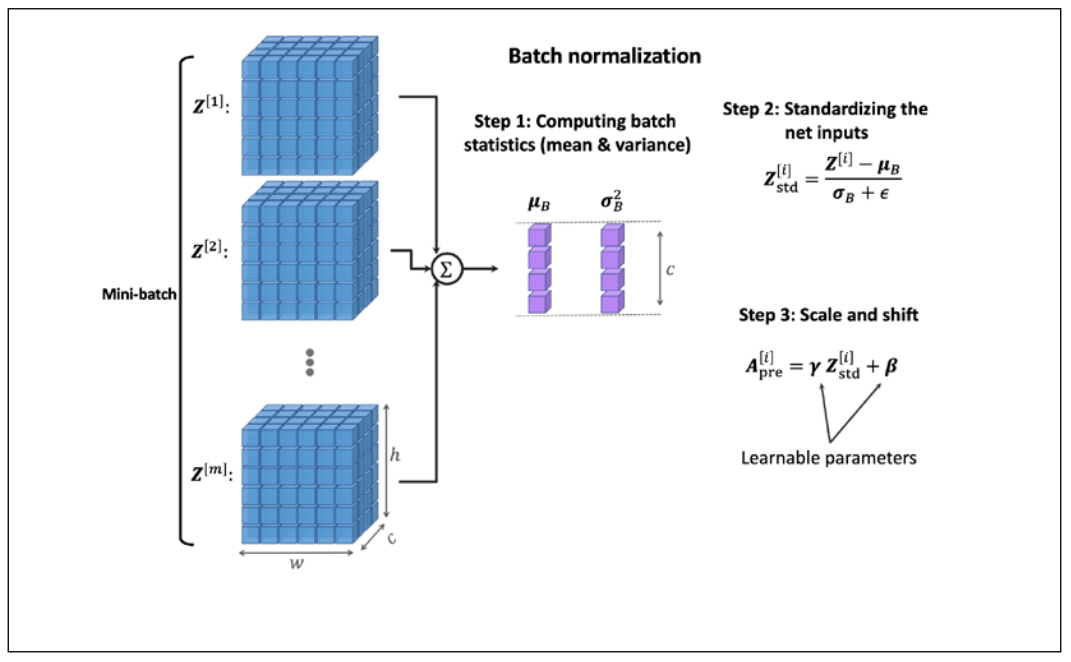

In [ ]:
Image(filename='drive/MyDrive/Colab Notebooks/Images/BatchNorm.png') 

## Architecture design considerations for convolutional GANs


Notice that the number of feature maps follows different trends
between the generator and the discriminator. In the generator,
we start with a large number of feature maps and decrease them
as we progress toward the last layer. On the other hand, in the
discriminator, we start with a small number of channels and
increase it toward the last layer. This is an important point for
designing CNNs with the number of feature maps and the spatial
size of the feature maps in reverse order. When the spatial size of
the feature maps increases, the number of feature maps decreases
and vice versa.
In addition, note that it's usually not recommended to use bias
units in the layer that follows a BatchNorm layer. Using bias units
would be redundant in this case, since BatchNorm already has a
shift parameter, 𝜷.

# Import packages

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import tensorflow_datasets as tfds

import time
import glob
import random
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

In [3]:
import tensorflow as tf
print("Tensor Flow version :", tf.__version__)
print("device available:", tf.config.list_physical_devices())

Tensor Flow version : 2.4.1
device available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Data

We use 3D diffraction pattern that were collected at the SIXS beamline (synchrotron SOLEIL), the 3D array were preprocessed via BCDI (@jeromecarnis) and then cropped to have the same shape.
For now we try to work with 24 diffraction patterns (not the same particle and different temperature but globally similar).

* Size of the input vector : 100
* random weight initialized with random uniform distribution
* image array shape : (192, 270, 360)

# Define a model for the generator:

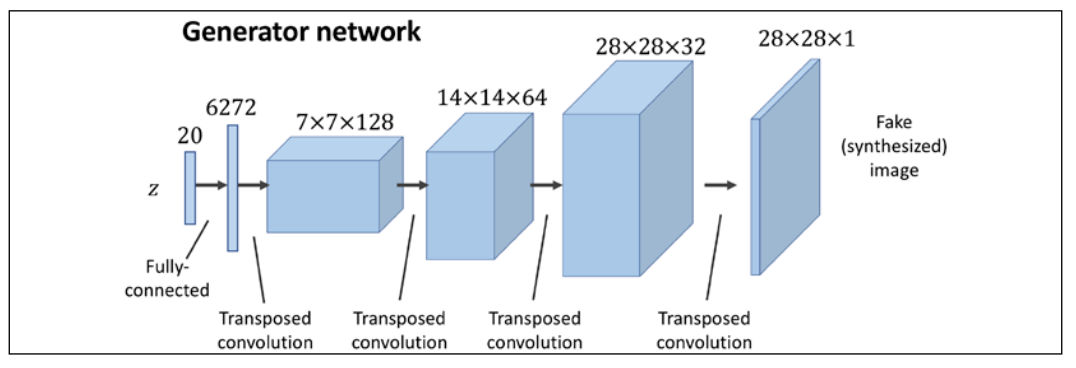

In [ ]:
Image(filename='drive/MyDrive/Colab Notebooks/Images/Generator_DCGAN.png') 

In [4]:
def make_dcgan_generator(z_size=20, output_size=(28, 28, 28, 1), n_filters=128, n_blocks=2):
  size_factor = 2**n_blocks
  print("Size factor:", size_factor)

  hidden_size = (
    output_size[0]//size_factor,
    output_size[1]//size_factor,
    output_size[2]//size_factor)
  print("First group size:", hidden_size)

  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(z_size,)),

    tf.keras.layers.Dense(units=n_filters*np.prod(hidden_size), use_bias=False),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Reshape((hidden_size[0], hidden_size[1], hidden_size[2], n_filters)),

    tf.keras.layers.Conv3DTranspose(filters=n_filters, kernel_size=5, strides=1, padding='same', use_bias=False),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU()
    ])

  nf = n_filters

  for i in range(n_blocks):
    nf = nf // 2
    
    model.add(tf.keras.layers.Conv3DTranspose(filters=nf, kernel_size=5, strides= 2, padding='same', use_bias=False))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Conv3DTranspose(filters=output_size[3], kernel_size=5, strides=1, padding='same', use_bias=False, activation='tanh'))

  return model

# Define a model for the discriminator:

should also try conv3D with 1 1 3 kernel or

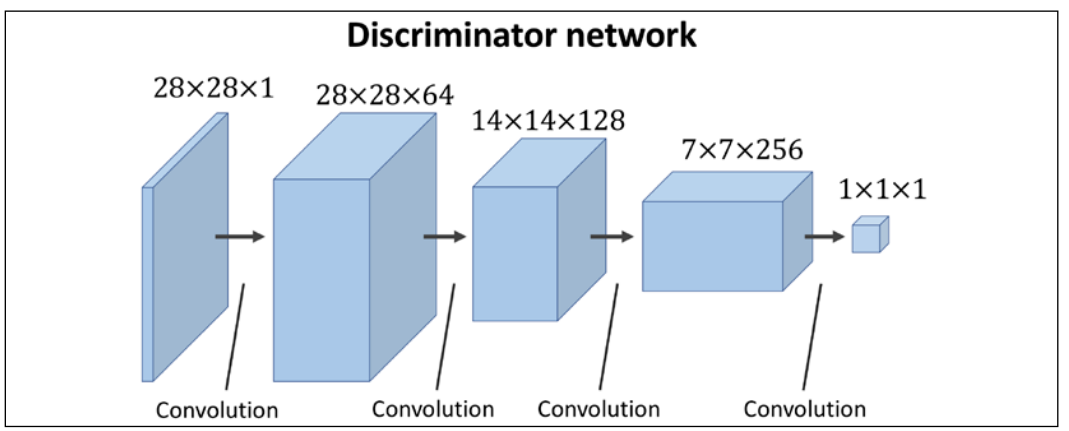

In [17]:
Image(filename='drive/MyDrive/Colab Notebooks/Images/Discriminator_DCGAN.png') 

In [5]:
def make_dcgan_discriminator(input_size=(28, 28, 28, 1), n_filters=64, n_blocks=2):
  
  final_kernel_size = input_size
  for i in range(n_blocks):
    final_kernel_size = (math.ceil(final_kernel_size[0]/2),
                         math.ceil(final_kernel_size[1]/2),
                         math.ceil(final_kernel_size[2]/2))

  print("Final kernel size:", final_kernel_size)

  model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=input_size),

    tf.keras.layers.Conv3D(filters=n_filters, kernel_size=5, strides=1, padding='same', name = "conv3D_to_n_filters"),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU()
    ])


  nf = n_filters
  for i in range(n_blocks):
    nf = nf*2

    model.add(tf.keras.layers.Conv3D(filters=nf, kernel_size=5, strides=2, padding='same'))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv3D(filters=1, kernel_size=final_kernel_size, padding='valid'))
  model.add(tf.keras.layers.Reshape((1,)))

  return model

# Loss function

Note that this particular architecture would not perform very well when using
cross-entropy as a loss function.

WGAN uses a modified loss function based on the so-called Wasserstein-1 (or earth mover's) distance between the
distributions of real and fake images for improving the training performance.

Let's assume $P_r$ is the distribution of the real examples and $P_g$ denotes the distributions of fake (generated) examples. $P_r$ and $P_g$ replace P and Q in the EM distance equation. Computing the EM distance is an optimization problem by itself; therefore, this becomes computationally intractable, especially if we want to repeat this computation in each iteration of the GAN training loop. Fortunately, though, the computation of the EM distance can be simplified using a theorem called Kantorovich-Rubinstein duality, as follows

$W(P_r , P_g) = sup_{||f||_L \leq 1} E_{u \in P_r} [f(u)] -  E_{v \in P_g} [f(v)]$

Here, the supremum is taken over all the 1-Lipschitz continuous functions denoted by $||f||_L \leq1$


Based on 1-Lipschitz continuity, the function, f, must satisfy the following property:

$|f(x_1) - f(x_2)| \leq |x_1 - x_2|$

How do we find such a 1-Lipschitz continuous function to
compute the Wasserstein distance between the distribution of real $P_r$ and fake $P_g$ outputs for a GAN? 

For WGAN, the discriminator can be changed to behave as a critic, which returns a scalar score instead of a probability value. We can interpret this score as how realistic the input images are (like an art critic giving scores to artworks in a gallery).

The critic (that is, the discriminator network) returns its outputs for the batch of real image examples and the batch of synthesized examples.

1.  The real component of the discriminator's loss: $L^D_{real} = - \frac{1}{N} \Sigma_i D(x_i)$

2.  The fake component of the discriminator's loss: $L^D_{fake} = \frac{1}{N} \Sigma_i D(G(z_i))$

3. The loss for the generator: $L^G = - \frac{1}{N} \Sigma_i  D(G(z_i))$


That will be all for the WGAN, except that we need to ensure that the 1-Lipschitz property of the critic function is  reserved during training. For this purpose, the WGAN paper proposes clamping the weights to a small region, for example,
[–0.01, 0.01].

# Gradient penalty

It has been shown that clipping the weights can lead to exploding and vanishing gradients. Furthermore, weight clipping can also lead to capacity underuse, which means that the critic network is limited to learning only some simple functions, as opposed to more complex functions. Therefore, rather than clipping the weights, Ishaan Guljarani et al. proposed gradient penalty (GP) as an alternative solution.


The procedure for the gradient penalty (GP) that is added in each iteration can be summarized by the following sequence of steps:
1. For each pair of real and fake examples ($x^{[i]}, x'^{[i]}$ in a given batch, choose a random number, $\alpha^{[i]}$ , sampled from a uniform distribution, that is, $\alpha^{[i]} \in 𝑈(0, 1)$.

2. Calculate an interpolation between the real and fake examples:
$x'^{[i]} = \alpha x^{[i]} + (1- \alpha) x'^{[i]}$, resulting in a batch of interpolated examples.

3. Compute the discriminator (critic) output for all the interpolated examples,
$D(x'^{[i]})$.

4. Calculate the gradients of the critic's output with respect to each interpolated example, that is: $\nabla_{x'^{[i]}} D(x'^{[i]})$

5. Compute the GP as $L^D_{gp} = \frac{1}{N} \Sigma_i (||\nabla_{x'^{[i]}} D(x'^{[i]})||_2 - 1)^2$

The total loss for the discriminator is then as follows
$L^D_{total} = L^D_{real} + L^D_{fake} + \lambda L^D_{gp}$

$\lambda$ is a tunable hyperparameter

In [30]:
# Overall parameters

image_size = (192, 270, 360)
batch_size = 5
channel_size = 1
num_epochs = 100
z_size = 20
mode_z = 'uniform' # 'uniform' vs. 'normal'
lambda_gp = 10.0

input_shape = (batch_size,)  + image_size + (channel_size,)

print("Input shape:", input_shape)

tf.random.set_seed(1)
np.random.seed(1)

Input shape: (5, 192, 270, 360, 1)


# Load data

Since the output layer of the generator is using the tanh
activation function, the pixel values of the synthesized images will be in the range
(–1, 1). However, the input pixels of the MNIST images are within the range [0, 255]
(with a TensorFlow data type tf.uint8 ). Thus, in the preprocessing steps, we will
use the tf.image.convert_image_dtype function to convert the dtype of the
input image tensors from tf.uint8 to tf.float32 . As a result, besides changing
the dtype , calling this function will also change the range of input pixel intensities
to [0, 1]. Then, we can scale them by a factor of 2 and shift them by –1 such that the
pixel intensities will be rescaled to be in the range [–1, 1]. Furthermore, we will also
create a random vector, z, based on the desired random distribution (in this code
example, uniform or normal, which are the most common choices), and return both
the preprocessed image and the random vector in a tuple

In [7]:
%%bash
mkdir GAN_data
cp drive/MyDrive/Colab\ Notebooks/GAN_data/cropped_data/*.npz GAN_data

# Generator function for data, so that no RAM is used

In [8]:
def data_generator(file_list, batch_size = 20):
    for file in file_list:
        temp = np.load(file)["data"]
        data = temp.reshape(temp.shape + (1,)) # Convert 3D data to 3D data with one channel

        yield data

# Create the train and test datasets

In [9]:
file_list = sorted(glob.glob("GAN_data/*.npz"))

file_list_train = random.sample(file_list, batch_size)

file_list_test = [f for f in file_list if f not in file_list_train]

In [10]:
train_dataset = tf.data.Dataset.from_generator(data_generator,
                                         args= [file_list_train],
                                         output_types= tf.float64,
                                         output_shapes = (192, 270, 360, 1)
                                         )

test_dataset = tf.data.Dataset.from_generator(data_generator,
                                         args= [file_list_test],
                                         output_types= tf.float64,
                                         output_shapes = (192, 270, 360, 1)
                                         )

# Combine input vector for generator and images for discriminator for the trainset

In [11]:
# Create output with two elements

def preprocess_GAN(image, mode='uniform'):
    # image = ex
    # image = tf.image.convert_image_dtype(image, tf.float32)

    # image = tf.reshape(image, [-1])
    # image = image*2 - 1.0
    if mode == 'uniform':
        input_z = tf.random.uniform(shape=(z_size,), minval=-1.0, maxval=1.0)
    elif mode == 'normal':
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

In [31]:
GAN_trainset = train_dataset.map(preprocess_GAN)
GAN_trainset = GAN_trainset.shuffle(5)
GAN_trainset = GAN_trainset.batch(batch_size, drop_remainder=True)

# Verify input data shape

One batch of 20 images seems toooo big

In [32]:
# Sadly only one batch of 20 images for now :/

for i,(input_z, input_real) in enumerate(GAN_trainset):
  print(input_z.shape, input_real.shape)

(5, 20) (5, 192, 270, 360, 1)
(5, 20) (5, 192, 270, 360, 1)
(5, 20) (5, 192, 270, 360, 1)
(5, 20) (5, 192, 270, 360, 1)


# Set up the models

In [20]:
GPU_name = tf.config.list_physical_devices("GPU")[0].name
GPU_name

'/physical_device:GPU:0'

In [24]:
with tf.device("GPU:0"):
    gen_model = make_dcgan_generator(z_size=20, output_size = image_size + (1,), n_filters=64, n_blocks=4)
    gen_model.summary()
    gen_model.build(input_shape=(None, z_size))

Size factor: 16
First group size: (12, 16, 22)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270336)            5406720   
_________________________________________________________________
batch_normalization_12 (Batc (None, 270336)            1081344   
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 270336)            0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 12, 16, 22, 64)    0         
_________________________________________________________________
conv3d_transpose_12 (Conv3DT (None, 12, 16, 22, 64)    512000    
_________________________________________________________________
batch_normalization_13 (Batc (None, 12, 16, 22, 64)    256       
_________________________________________________________________
leaky_r

In [25]:
with tf.device("GPU:0"):
    disc_model = make_dcgan_discriminator(input_size = image_size + (1,), n_filters=16, n_blocks=4)
    disc_model.summary()
    disc_model.build(input_shape=(None, np.prod(image_size)))

Final kernel size: (12, 17, 23)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3D_to_n_filters (Conv3D) (None, 192, 270, 360, 16) 2016      
_________________________________________________________________
batch_normalization_18 (Batc (None, 192, 270, 360, 16) 64        
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 192, 270, 360, 16) 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 96, 135, 180, 32)  64032     
_________________________________________________________________
batch_normalization_19 (Batc (None, 96, 135, 180, 32)  128       
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 96, 135, 180, 32)  0         
_________________________________________________________________
dropout (Dropout)     

Notice that the number of parameters for the BatchNorm layers is indeed four times the number of channels ( 4 × channels ). Remember that the BatchNorm parameters, $\mu_B$ and $\sigma_B$ , represent the (non-trainable parameters) mean and standard deviation for each feature value inferred from a given batch; $\gamma$ and $\beta$ are the trainable BN parameters.

Now we can train the model. Note that, typically, the RMSprop optimizer is
recommended for WGAN (without the GP), whereas the Adam optimizer is used
for WGAN-GP.

In [26]:
## Optimizers:
g_optimizer = tf.keras.optimizers.Adam(0.0002)
d_optimizer = tf.keras.optimizers.Adam(0.0002)

In [27]:
if mode_z == 'uniform':
  fixed_z = tf.random.uniform(shape=(batch_size, z_size), minval=-1, maxval=1)
elif mode_z == 'normal':
  fixed_z = tf.random.normal(shape=(batch_size, z_size))

def create_samples(g_model, input_z):
  g_output = g_model(input_z, training=False)
  images = tf.reshape(g_output, (batch_size, *image_size))

  return (images+1)/2.0

all_losses = []
epoch_samples = []
start_time = time.time()

In [33]:
with tf.device("GPU:0"):

    for epoch in range(1, 1+1):
      epoch_losses = []

      for i,(input_z,input_real) in enumerate(GAN_trainset):
        with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
          g_output = gen_model(input_z, training=True)
          d_critics_real = disc_model(input_real, training=True)
          d_critics_fake = disc_model(g_output, training=True)

          ## Compute generator's loss:
          g_loss = -tf.math.reduce_mean(d_critics_fake)
          
          ## compute discriminator's losses:
          d_loss_real = -tf.math.reduce_mean(d_critics_real)
          d_loss_fake = tf.math.reduce_mean(d_critics_fake)
          d_loss = d_loss_real + d_loss_fake

          ## Gradient-penalty:
          with tf.GradientTape() as gp_tape:
            alpha = tf.random.uniform(
              shape=[d_critics_real.shape[0], 1, 1, 1],
              minval=0.0, maxval=1.0)
            
            interpolated = (alpha*input_real + (1-alpha)*g_output)

            gp_tape.watch(interpolated)
            d_critics_intp = disc_model(interpolated)

          grads_intp = gp_tape.gradient(d_critics_intp, [interpolated,])[0]

          grads_intp_l2 = tf.sqrt(tf.reduce_sum(tf.square(grads_intp), axis=[1, 2, 3]))

          grad_penalty = tf.reduce_mean(tf.square(grads_intp_l2 - 1.0))
          
          d_loss = d_loss + lambda_gp*grad_penalty
          
        ## Optimization: Compute the gradients apply them
        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)
        
        d_optimizer.apply_gradients(grads_and_vars=zip(d_grads, disc_model.trainable_variables))
        
        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)

        g_optimizer.apply_gradients(grads_and_vars=zip(g_grads, gen_model.trainable_variables))
        
        epoch_losses.append((g_loss.numpy(), d_loss.numpy(), d_loss_real.numpy(), d_loss_fake.numpy()))
        
        all_losses.append(epoch_losses)
        print(
          'Epoch {:03d} | ET {:.2f} min | Avg Losses >>'
          ' G/D {:6.2f}/{:6.2f} [D-Real: {:6.2f}'
          ' D-Fake: {:6.2f}]'
          .format(
              epoch, (time.time() - start_time)/60,
              *list(np.mean(all_losses[-1], axis=0))))
        
        epoch_samples.append(
            create_samples(gen_model, fixed_z).numpy())

ResourceExhaustedError: ignored

In [ ]:
# selected_epochs = [1, 2, 4, 10, 50, 100]

selected_epochs = [1]
fig = plt.figure(figsize=(10, 14))
for i,e in enumerate(selected_epochs):
  for j in range(5):
    ax = fig.add_subplot(6, 5, i*5+j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    if j == 0:
      ax.text(-0.06, 0.5, 'Epoch {}'.format(e), rotation=90, size=18, color='red', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    image = epoch_samples[e-1][j]
    ax.imshow(image, cmap='gray_r')
plt.show()

# Other data below

In [7]:
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

In [10]:
def preprocess(ex, mode='uniform'):
    image = ex['image']
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image*2 - 1.0
    if mode == 'uniform':
        input_z = tf.random.uniform(shape=(z_size,), minval=-1.0, maxval=1.0)
    elif mode == 'normal':
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

In [55]:
mnist_trainset = mnist['train']
mnist_trainset = mnist_trainset.map(preprocess)
mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(batch_size, drop_remainder=True)
for i,(input_z,input_real) in enumerate(mnist_trainset):
  print(input_z.shape, input_real.shape)

(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)
(20, 20) (20, 28, 28, 1)


KeyboardInterrupt: ignored